# Your first autoencoder

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

This notebook is referenced in Chapter 25 and 26 in the book.

## Notebook learning goals

At the end of this notebook you will be able to build a simple autoencoder with Keras, using `Dense` layers in Keras and apply to images, in particular to the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset and the [fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) dataset as examples.

In [1]:
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import time

from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


## MNIST and FASHION MNIST dataset 

In [2]:
from keras.datasets import mnist
import numpy as np
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [3]:
mnist_x_train = mnist_x_train.astype('float32') / 255.
mnist_x_test = mnist_x_test.astype('float32') / 255.
mnist_x_train = mnist_x_train.reshape((len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_test = mnist_x_test.reshape((len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

In [4]:
from keras.datasets import fashion_mnist
import numpy as np
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()

In [5]:
fashion_x_train = fashion_x_train.astype('float32') / 255.
fashion_x_test = fashion_x_test.astype('float32') / 255.
fashion_x_train = fashion_x_train.reshape((len(fashion_x_train), np.prod(fashion_x_train.shape[1:])))
fashion_x_test = fashion_x_test.reshape((len(fashion_x_test), np.prod(fashion_x_test.shape[1:])))

## Function to create the autoencoders

In [6]:
def create_autoencoders (feature_layer_dim = 16):
  input_img = Input(shape = (784,), name = 'Input_Layer')
  encoded = Dense(feature_layer_dim, activation = 'relu', name = 'Encoded_Features')(input_img)
  decoded = Dense(784, activation = 'sigmoid', name = 'Decoded_Input')(encoded)

  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)

  encoded_input = Input(shape = (feature_layer_dim,))
  decoder = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder(encoded_input))

  return autoencoder, encoder, decoder

## (784,16,784)




In [7]:
autoencoder, encoder, decoder = create_autoencoders (16)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

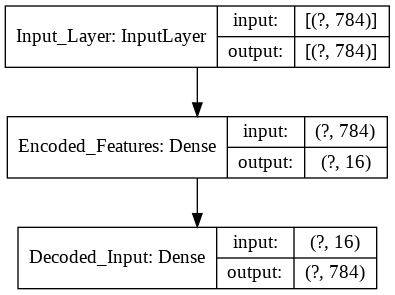

In [32]:
keras.utils.plot_model(autoencoder, show_shapes=True)

### Model compilation

In [33]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
history = autoencoder.fit(mnist_x_train, mnist_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_test, mnist_x_test))

Epoch 1/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3083 - val_loss: 0.2183
Epoch 2/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1982 - val_loss: 0.1806
Epoch 3/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1719 - val_loss: 0.1624
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1581 - val_loss: 0.1513
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1491 - val_loss: 0.1445
Epoch 6/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1441 - val_loss: 0.1409
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1410 - val_loss: 0.1384
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1387 - val_loss: 0.1362
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1368 - val_loss: 0.1345
Epoch 10/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1352 - val_lo

In [35]:
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

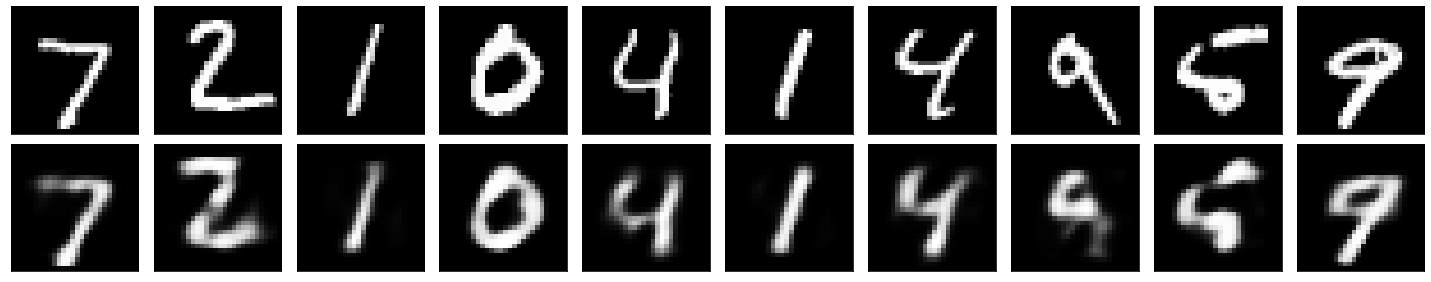

In [36]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig('comparison_16.png')

# Autoencoders (784,64,784)







In [37]:
autoencoder, encoder, decoder = create_autoencoders (64)

In [38]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [39]:
autoencoder.fit(mnist_x_train, mnist_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_test, mnist_x_test))

Epoch 1/30
235/235 [==============================] - 3s 12ms/step - loss: 0.2436 - val_loss: 0.1633
Epoch 2/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1443 - val_loss: 0.1277
Epoch 3/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1195 - val_loss: 0.1102
Epoch 4/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1053 - val_loss: 0.0988
Epoch 5/30
235/235 [==============================] - 3s 12ms/step - loss: 0.0960 - val_loss: 0.0911
Epoch 6/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0894 - val_loss: 0.0858
Epoch 7/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0846 - val_loss: 0.0819
Epoch 8/30
235/235 [==============================] - 3s 11ms/step - loss: 0.0814 - val_loss: 0.0793
Epoch 9/30
235/235 [==============================] - 3s 11ms/step - loss: 0.0791 - val_loss: 0.0775
Epoch 10/30
235/235 [==============================] - 3s 11ms/step - loss: 0.0776 - val_lo

In [40]:
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

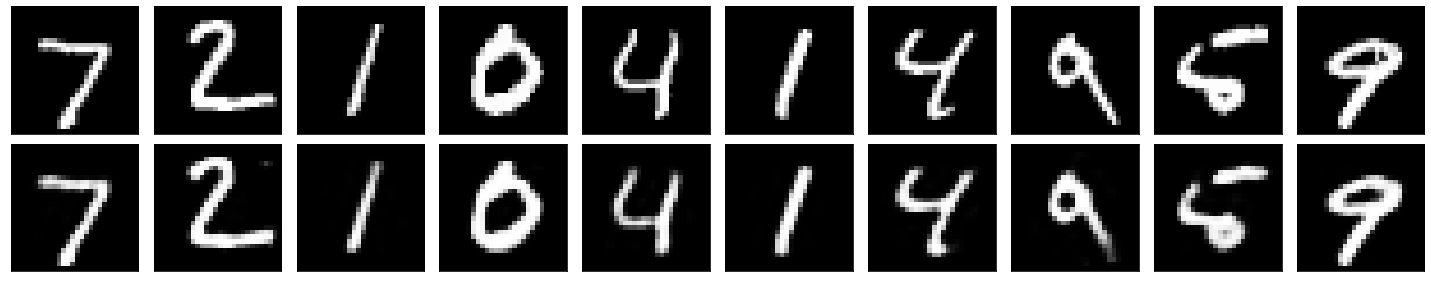

In [41]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig('comparison_32.png')

#(784,8,784)

In [23]:
autoencoder, encoder, decoder = create_autoencoders (8)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(mnist_x_train, mnist_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_test, mnist_x_test))

Epoch 1/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3356 - val_loss: 0.2443
Epoch 2/30
235/235 [==============================] - 2s 9ms/step - loss: 0.2227 - val_loss: 0.2051
Epoch 3/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1974 - val_loss: 0.1887
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1859 - val_loss: 0.1815
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1813 - val_loss: 0.1784
Epoch 6/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1788 - val_loss: 0.1763
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1771 - val_loss: 0.1748
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1756 - val_loss: 0.1733
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1743 - val_loss: 0.1721
Epoch 10/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1732 - val_loss: 

In [24]:
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [25]:
encoded_imgs.shape

(10000, 8)

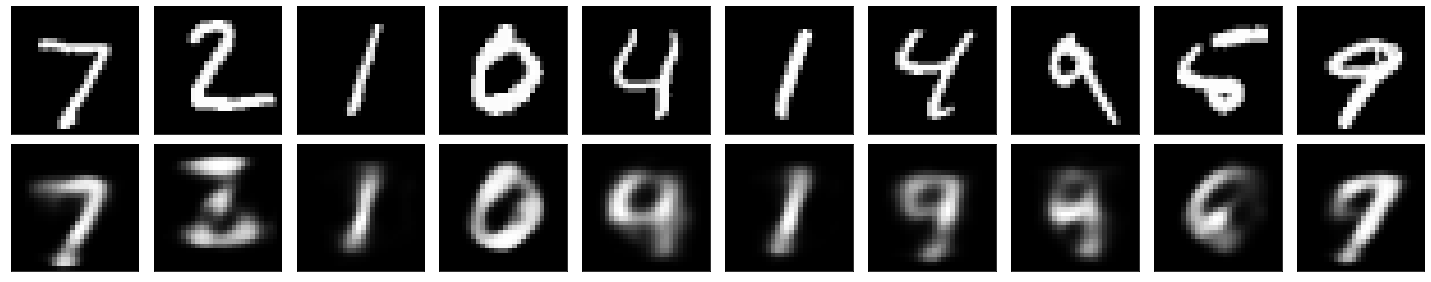

In [26]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig('comparison_8.png')

## kNN Study

In [28]:
encoded_train_imgs = encoder.predict(mnist_x_train)
#decoded_imgs = decoder.predict(encoded_imgs)

In [35]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    #plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.3)
    ax = sns.heatmap(data, annot=True, cmap="Blues", cbar_kws={'label': 'Scale'},fmt='d')
 
    ax.set_xticklabels(labels, fontsize = 16)
    ax.set_yticklabels(labels, fontsize = 16)
 
    ax.set_xlabel("Predicted Label", fontsize = 16)
    ax.set_xlabel("True Label", fontsize = 16)
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

In [30]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import seaborn as sns
  


In [33]:
start = time.time()
 
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_train_imgs, mnist_y_train) 
  
# accuracy on X_test 
accuracy = knn.score(encoded_imgs, mnist_y_test) 
print (accuracy )

end = time.time()
print(end - start)
  


0.8986
1.4894161224365234


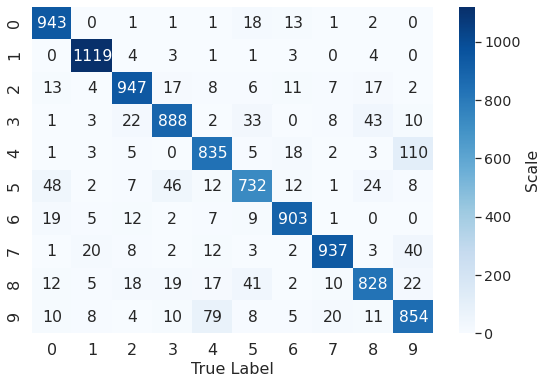

In [36]:
# creating a confusion matrix 
knn_predictions = knn.predict(encoded_imgs)  
cm = confusion_matrix(mnist_y_test, knn_predictions)
cm 
plot_confusion_matrix(cm, [0,1,2,3,4,5,6,7,8,9], "confusion_matrix.png")

### kNN With all the features

In [11]:
start = time.time()

from sklearn.neighbors import KNeighborsClassifier 
knn2 = KNeighborsClassifier(n_neighbors = 7).fit(mnist_x_train, mnist_y_train) 
# accuracy on X_test 
accuracy = knn2.score(mnist_x_test, mnist_y_test) 
print (accuracy )

end = time.time()
print(end - start)

0.9694
999.7572972774506


In [12]:
1000/60 
# 16 minutes

16.666666666666668

In [ ]:
# creating a confusion matrix 
knn_predictions = knn2.predict(encoded_imgs)  
cm = confusion_matrix(mnist_y_test, knn_predictions)
cm 
plot_confusion_matrix(cm, [0,1,2,3,4,5,6,7,8,9], "confusion_matrix_total.png")

# MSE

In [ ]:
dim = 16

input_img = Input(shape = (784,))
encoded = Dense(dim, activation = 'relu')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [ ]:
encoded_input = Input(shape = (dim,))
decoder = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0807 - val_loss: 0.0524
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0448 - val_loss: 0.0387
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0359 - val_loss: 0.0329
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0317 - val_loss: 0.0298
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0287 - val_loss: 0.0268
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0266 - val_loss: 0.0256
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0256 - val_loss: 0.0248
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0248 - val_loss: 0.0241
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0242 - val_loss: 0.0235
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0237 - val_loss: 0.0230

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

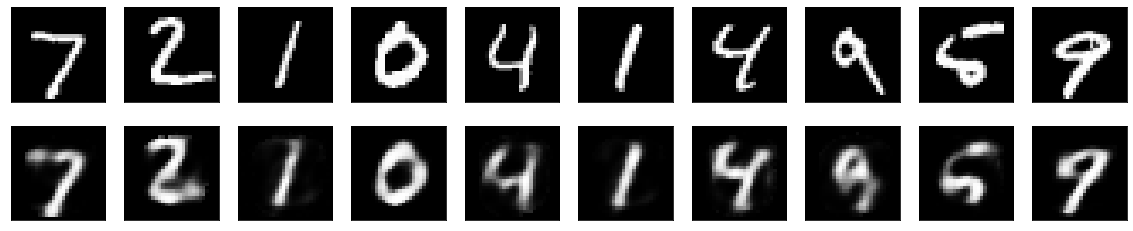

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Fashion MNIST

In [39]:
autoencoder, encoder, decoder = create_autoencoders (8)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(fashion_x_train, fashion_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(fashion_x_test, fashion_x_test))

Epoch 1/30
235/235 [==============================] - 3s 11ms/step - loss: 0.4659 - val_loss: 0.3832
Epoch 2/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3655 - val_loss: 0.3541
Epoch 3/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3459 - val_loss: 0.3423
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3356 - val_loss: 0.3340
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3293 - val_loss: 0.3292
Epoch 6/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3255 - val_loss: 0.3260
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3227 - val_loss: 0.3237
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3205 - val_loss: 0.3216
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3188 - val_loss: 0.3202
Epoch 10/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3176 - val_los

In [40]:
encoded_imgs = encoder.predict(fashion_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

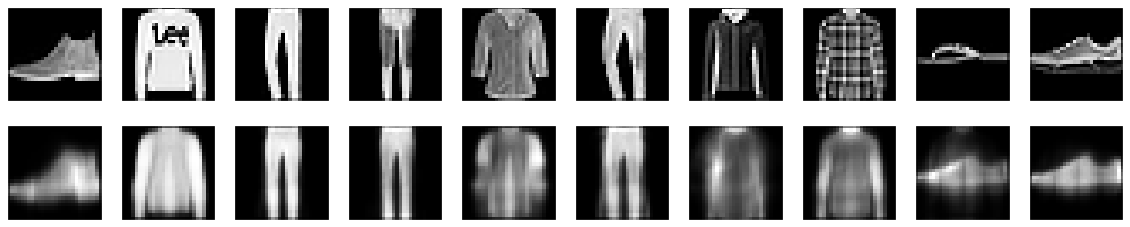

In [42]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(fashion_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
start = time.time()

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(fashion_x_train, fashion_y_train) 
# accuracy on X_test 
accuracy = knn.score(fashion_x_test, fashion_y_test) 
print (accuracy )

end = time.time()
print(end - start)

0.854
1046.022537946701


## kNN on learned representation

In [48]:
encoded_fashion_train_imgs = encoder.predict(fashion_x_train)
encoded_fashion_test_imgs = encoder.predict(fashion_x_test)

In [49]:
start = time.time()
 
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_fashion_train_imgs, fashion_y_train) 
  
# accuracy on X_test 
accuracy = knn.score(encoded_fashion_test_imgs, fashion_y_test) 
print (accuracy )

end = time.time()
print(end - start)

0.7982
0.9014310836791992


# (784,16,784)

In [50]:
autoencoder, encoder, decoder = create_autoencoders (16)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(fashion_x_train, fashion_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(fashion_x_test, fashion_x_test))

Epoch 1/30
235/235 [==============================] - 2s 10ms/step - loss: 0.4417 - val_loss: 0.3679
Epoch 2/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3452 - val_loss: 0.3334
Epoch 3/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3253 - val_loss: 0.3217
Epoch 4/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3155 - val_loss: 0.3140
Epoch 5/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3091 - val_loss: 0.3088
Epoch 6/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3051 - val_loss: 0.3057
Epoch 7/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3026 - val_loss: 0.3039
Epoch 8/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3012 - val_loss: 0.3027
Epoch 9/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3003 - val_loss: 0.3020
Epoch 10/30
235/235 [==============================] - 2s 9ms/step - loss: 0.2996 - val_loss: 0.301

In [51]:
encoded_fashion_train_imgs = encoder.predict(fashion_x_train)
encoded_fashion_test_imgs = encoder.predict(fashion_x_test)

In [52]:
start = time.time()
 
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_fashion_train_imgs, fashion_y_train) 
  
# accuracy on X_test 
accuracy = knn.score(encoded_fashion_test_imgs, fashion_y_test) 
print (accuracy )

end = time.time()
print(end - start)

0.8343
3.603889226913452
